In [2]:
# Import libaries
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('nigeria_houses_data.csv')

In [4]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [5]:
df['town'].value_counts()

Lekki           10895
Ajah             2164
Ikoyi            1547
Ikeja             688
Ibeju Lekki       503
                ...  
Ethiope West        1
Jos North           1
Orile               1
Ohaji/Egbema        1
Ikpoba Okha         1
Name: town, Length: 189, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [7]:
lagosTowns = df[df['state'] == 'Lagos']['town']
lagosOnly = df[df['state'] == 'Lagos']

In [8]:
lagosOnly['town'].value_counts()

Lekki                   10841
Ajah                     2142
Ikoyi                    1541
Ikeja                     686
Victoria Island (VI)      493
Ibeju Lekki               492
Magodo                    375
Ikorodu                   236
Isheri North              194
Isolo                     176
Alimosho                  142
Agege                     123
Surulere                  122
Ojodu                      91
Yaba                       86
Ipaja                      85
Ifako-Ijaiye               82
Ikotun                     75
Maryland                   65
Gbagada                    55
Ogudu                      43
Amuwo Odofin               42
Ojo                        35
Epe                        33
Ilupeju                    31
Ayobo                      22
Ketu                       17
Shomolu                    17
Isheri                     16
Ejigbo                     12
Apapa                      11
Oshodi                     11
Idimu                       9
Badagry   

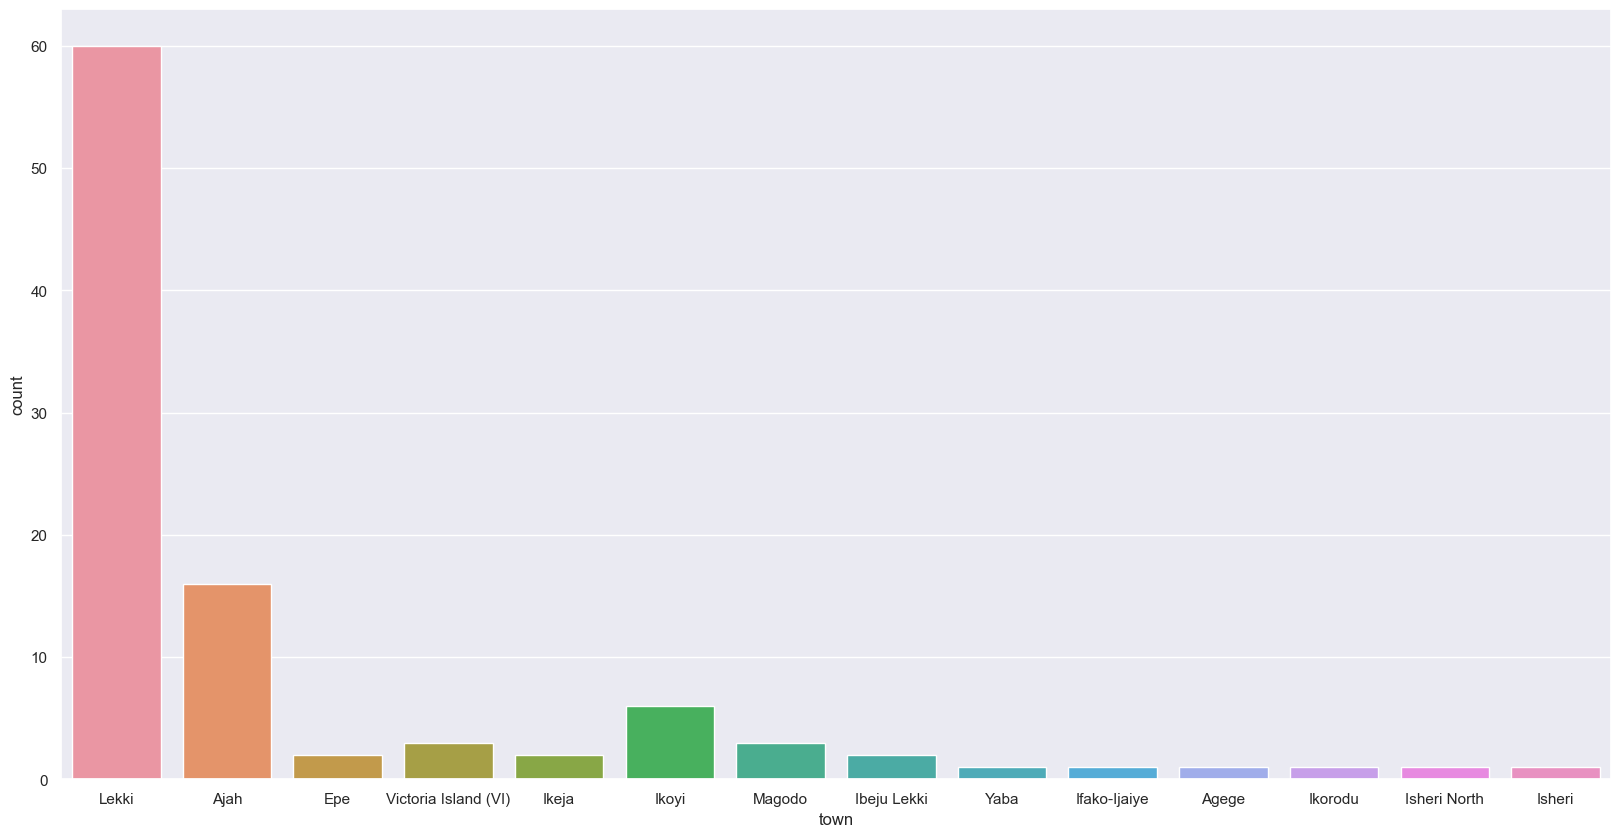

In [9]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='town', data=lagosOnly[:100])

In [10]:
df['title'].unique()

array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

# Exploratory Analysis

In [11]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [12]:
# Finding the number of houses types 
uniqueTitle = df['title'].nunique()
print(f"There are {uniqueTitle} type of Houses in the dataset")

#Finding the number of towns 
uniqueTown = df['town'].nunique()
print(f'There are {uniqueTown} number of towns in the dataset ')

There are 7 type of Houses in the dataset
There are 189 number of towns in the dataset 


<AxesSubplot: title={'center': 'Most expensive houses in nigeria'}, xlabel='Towns', ylabel='Prices'>

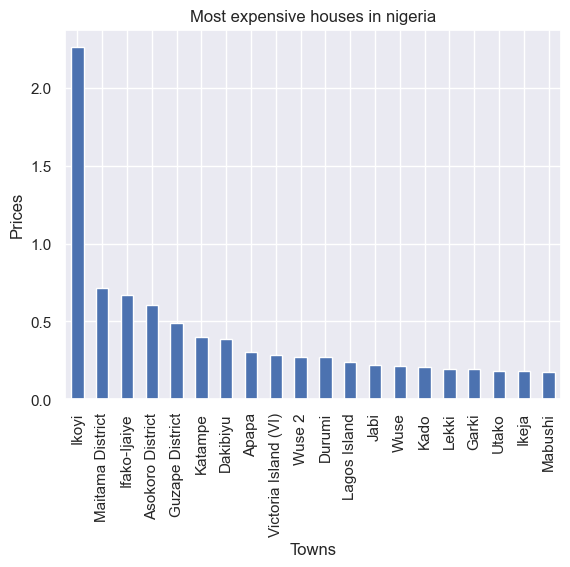

In [13]:
# Grouping by town according to price
(
(df.groupby('town')['price'].mean()/1e9)
.sort_values(ascending=False)
.head(20)
.plot(kind='bar', xlabel='Towns', ylabel='Prices', title='Most expensive houses in nigeria')
) 

During the analysis it was observed that Ikoyi and Ifako-Ijaiye might have possible outliars 

In [14]:
ikoyiMax = df[df['town'] == 'Ikoyi'].max()

ikoyiMax

bedrooms                       9.0
bathrooms                      9.0
toilets                        9.0
parking_space                  9.0
title            Terraced Duplexes
town                         Ikoyi
state                        Lagos
price              1800000000000.0
dtype: object

In [15]:
Ifako_Ijaiye_Max = df[df['town'] == 'Ifako-Ijaiye'].max()

Ifako_Ijaiye_Max

bedrooms                       7.0
bathrooms                      8.0
toilets                        8.0
parking_space                  8.0
title            Terraced Bungalow
town                  Ifako-Ijaiye
state                        Lagos
price                55000000000.0
dtype: object

It has been discovered that a house in Ifako-Ijaiye is selling for 55 billion naira, this outlair affects out analysis results

Also there is a house in ikoyi selling for 1.8 trillion naira

These outlairs are harmfull to our dataset



## Data Cleaning

In [16]:
# Removing Outliers

trim_df = q1, q9 = df["price"].quantile([0.15,0.85])
mask_df = df["price"].between(q1,q9)
trimmed_df = df[mask_df]
trimmed_df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [17]:
# Checking states in df 

fewValues =  trimmed_df['state'].value_counts()

fewValues

Lagos        13805
Abuja         2462
Rivers         339
Oyo            229
Imo            195
Ogun           141
Enugu           96
Anambara        83
Edo             51
Delta           42
Akwa Ibom       13
Kaduna           8
Ekiti            5
Abia             5
Kogi             4
Nasarawa         4
Osun             3
Kwara            2
Borno            2
Bayelsa          1
Niger            1
Name: state, dtype: int64

In [18]:
#Removing States with less than 100 values

trimmed_df = trimmed_df[~trimmed_df['state'].isin(fewValues[fewValues<100].index)]

trimmed_df['state'].value_counts()

Lagos     13805
Abuja      2462
Rivers      339
Oyo         229
Imo         195
Ogun        141
Name: state, dtype: int64

<AxesSubplot: title={'center': 'Most expensve housing towns in nigeria'}, xlabel='Towns', ylabel='Prices'>

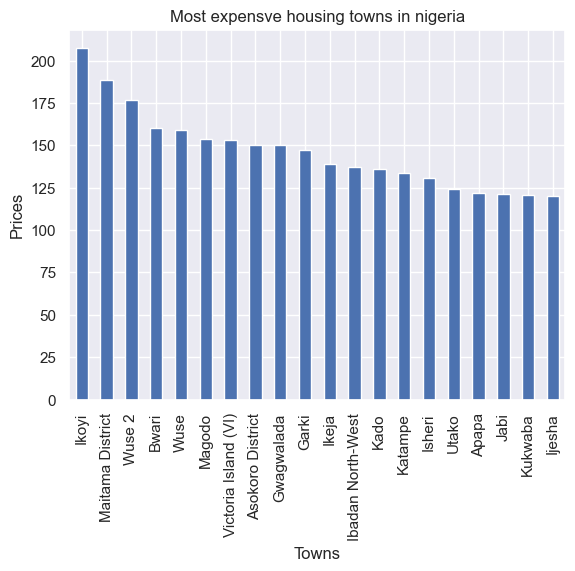

In [19]:
#Plotting 
(
    (trimmed_df.groupby('town')['price'].mean()/1e6)
    .sort_values(ascending=False)
    .head(20)
    .plot(kind='bar',xlabel='Towns',ylabel='Prices',title='Most expensve housing towns in nigeria')
)

<AxesSubplot: title={'center': 'Most expensve housing towns in nigeria'}, xlabel='Towns', ylabel='Prices'>

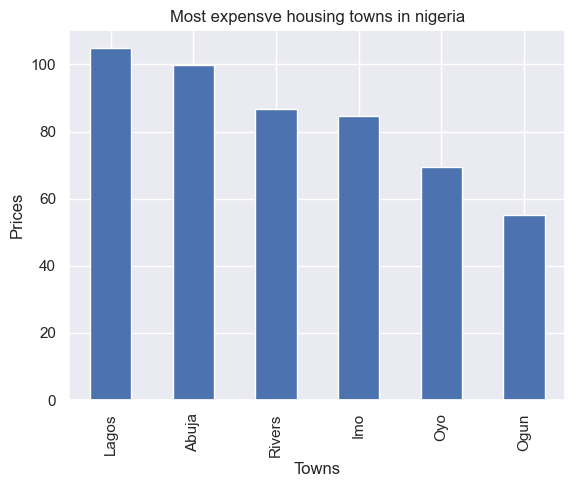

In [20]:
#Plotting states 
(
    (trimmed_df.groupby('state')['price'].mean()/1e6)
    .sort_values(ascending=False)
    .plot(kind='bar',xlabel='Towns',ylabel='Prices',title='Most expensve housing towns in nigeria')
)

From the results above we can see that Lagos has the most expensive houses on average, followed by Abuja

<AxesSubplot: title={'center': 'Most expensve housing towns in nigeria'}, xlabel='Towns', ylabel='Prices'>

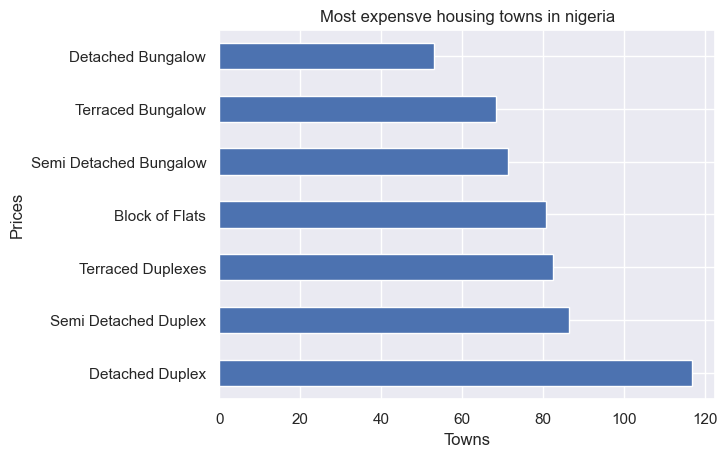

In [21]:
(
    (trimmed_df.groupby('title')['price'].mean()/1e6)
    .sort_values(ascending=False)
    .plot(kind='barh',xlabel='Towns',ylabel='Prices',title='Most expensve housing towns in nigeria')
)

<AxesSubplot: title={'center': 'Most expensve housing towns in Lagos'}, xlabel='Towns', ylabel='Prices'>

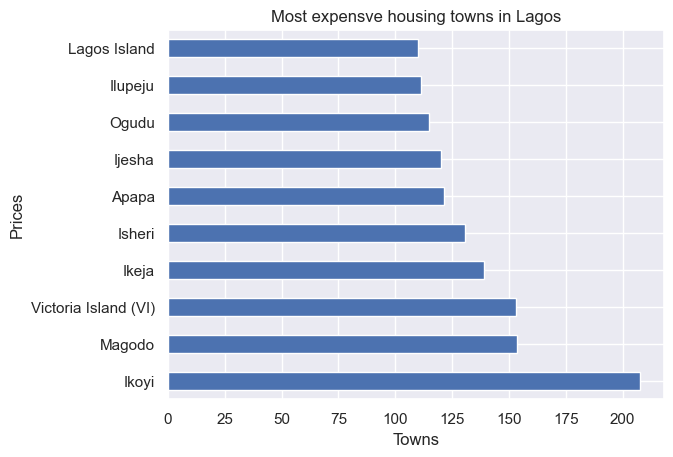

In [22]:
trimmed_df_lagos = trimmed_df[trimmed_df['state']=='Lagos']
(
    (trimmed_df_lagos.groupby('town')['price'].mean()/1e6)
    .sort_values(ascending=False)
    .head(10)
    .plot(kind='barh',xlabel='Towns',ylabel='Prices',title='Most expensve housing towns in Lagos')
)

In [23]:
trimmed_df_lagos['town'].value_counts()

Lekki                   9134
Ajah                    1797
Ikeja                    609
Magodo                   360
Victoria Island (VI)     300
Ikoyi                    255
Ibeju Lekki              193
Isheri North             183
Isolo                    164
Surulere                 106
Alimosho                  92
Yaba                      75
Maryland                  58
Agege                     56
Ojodu                     55
Gbagada                   51
Ikorodu                   49
Ogudu                     43
Amuwo Odofin              40
Ilupeju                   29
Ipaja                     22
Ikotun                    21
Shomolu                   15
Ojo                       15
Isheri                    15
Ketu                      13
Ifako-Ijaiye              13
Oshodi                     9
Ejigbo                     7
Idimu                      4
Kosofe                     3
Lagos Island               3
Agbara-Igbesa              3
Apapa                      3
Ijaiye        

In [24]:
dfLekki = trimmed_df_lagos[trimmed_df_lagos['town']=='Lekki'].reset_index()

dfLekki.drop(columns=['index','state'], inplace=True)


In [25]:
dfLekki

,bedrooms,bathrooms,toilets,parking_space,title,town,price
0,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,120000000.0
1,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,75000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,65000000.0
3,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,200000000.0
4,4.0,5.0,6.0,3.0,Semi Detached Duplex,Lekki,65000000.0
...,...,...,...,...,...,...,...
9129,4.0,4.0,5.0,3.0,Terraced Duplexes,Lekki,75000000.0
9130,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,110000000.0
9131,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,80000000.0
9132,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,68000000.0


In [26]:
dfAjah = trimmed_df_lagos[trimmed_df_lagos['town']=='Ajah'].reset_index()

dfAjah.drop(columns=['index','state'], inplace=True)

In [27]:
dfAjah

,bedrooms,bathrooms,toilets,parking_space,title,town,price
0,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,40000000.0
1,4.0,4.0,5.0,5.0,Detached Duplex,Ajah,60000000.0
2,4.0,4.0,5.0,3.0,Detached Duplex,Ajah,60000000.0
3,3.0,5.0,5.0,4.0,Terraced Duplexes,Ajah,40000000.0
4,4.0,4.0,5.0,3.0,Semi Detached Duplex,Ajah,60000000.0
...,...,...,...,...,...,...,...
1792,4.0,4.0,5.0,3.0,Semi Detached Duplex,Ajah,75000000.0
1793,2.0,2.0,2.0,2.0,Detached Duplex,Ajah,240000000.0
1794,3.0,4.0,4.0,3.0,Terraced Duplexes,Ajah,40000000.0
1795,5.0,5.0,6.0,6.0,Detached Duplex,Ajah,130000000.0


<AxesSubplot: >

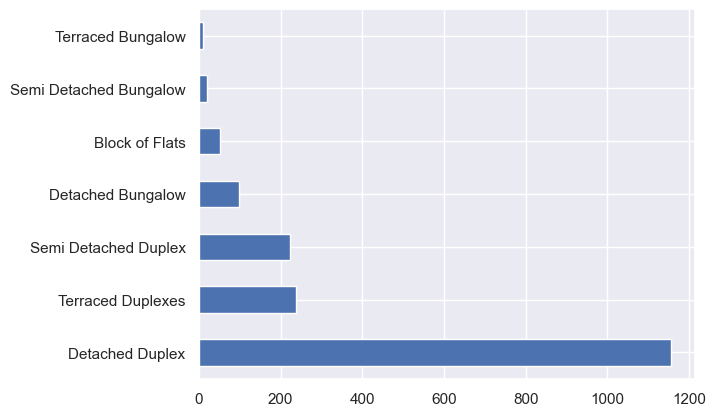

In [28]:
dfAjah['title'].value_counts().plot(kind='barh')

<AxesSubplot: >

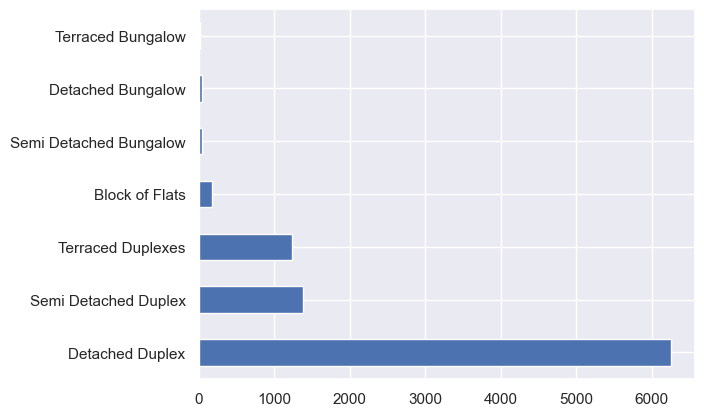

In [29]:
dfLekki['title'].value_counts().plot(kind='barh')

In [30]:
dfLekki.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,9134.000000,9134.000000,9134.000000,9134.000000,9.134000e+03
mean,4.471097,4.697613,5.427414,3.986643,1.074863e+08
std,0.681831,0.763707,0.760587,1.121365,4.855801e+07
min,1.000000,1.000000,1.000000,1.000000,3.500000e+07
25%,4.000000,4.000000,5.000000,4.000000,7.000000e+07
50%,5.000000,5.000000,5.000000,4.000000,9.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.300000e+08
max,9.000000,9.000000,9.000000,9.000000,2.600000e+08


In [31]:
dfLekki.rename({'title':'houseType'}, axis=1, inplace=True)

dfLekki.head()

,bedrooms,bathrooms,toilets,parking_space,houseType,town,price
0,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,120000000.0
1,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,75000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,65000000.0
3,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,200000000.0
4,4.0,5.0,6.0,3.0,Semi Detached Duplex,Lekki,65000000.0


Detached Duplex           6259
Semi Detached Duplex      1376
Terraced Duplexes         1232
Block of Flats             169
Semi Detached Bungalow      41
Detached Bungalow           38
Terraced Bungalow           19
Name: houseType, dtype: int64


<AxesSubplot: title={'center': 'Average Price by House Type in Lekki'}, xlabel='House Type', ylabel='Prices'>

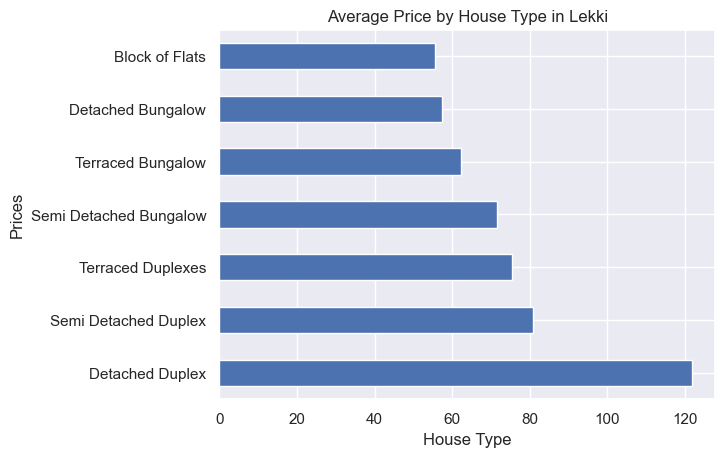

In [32]:
print(dfLekki["houseType"].value_counts())
(
    (dfLekki.groupby("houseType")["price"].mean()/1e6)
    .sort_values(ascending=False).
    plot(kind="barh",
         xlabel = "House Type",
         ylabel = "Prices",
         title = "Average Price by House Type in Lekki"
        )
)

In [33]:
# Sum the total rooms from bedroom bathroom toilets and parking space
dfLekki["total_rooms"] = dfLekki["bedrooms"] + dfLekki["bathrooms"] + dfLekki["toilets"] + dfLekki["parking_space"]


In [34]:
# Swap the positions of the price and total_rooms columns
cols = list(dfLekki.columns)
cols[-1], cols[-2] = cols[-2], cols[-1]
dfLekki = dfLekki[cols]

dfLekki

,bedrooms,bathrooms,toilets,parking_space,houseType,town,total_rooms,price
0,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,18.0,120000000.0
1,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,15.0,75000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,18.0,65000000.0
3,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,4.0,200000000.0
4,4.0,5.0,6.0,3.0,Semi Detached Duplex,Lekki,18.0,65000000.0
...,...,...,...,...,...,...,...,...
9129,4.0,4.0,5.0,3.0,Terraced Duplexes,Lekki,16.0,75000000.0
9130,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,18.0,110000000.0
9131,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,16.0,80000000.0
9132,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,18.0,68000000.0


In [35]:
# Swap the positions of the House type and total_rooms columns
cols = list(dfLekki.columns)
cols[-4], cols[-2] = cols[-2], cols[-4]
dfLekki = dfLekki[cols]

dfLekki

,bedrooms,bathrooms,toilets,parking_space,total_rooms,town,houseType,price
0,4.0,5.0,5.0,4.0,18.0,Lekki,Detached Duplex,120000000.0
1,4.0,4.0,5.0,2.0,15.0,Lekki,Semi Detached Duplex,75000000.0
2,4.0,5.0,5.0,4.0,18.0,Lekki,Detached Duplex,65000000.0
3,1.0,1.0,1.0,1.0,4.0,Lekki,Detached Duplex,200000000.0
4,4.0,5.0,6.0,3.0,18.0,Lekki,Semi Detached Duplex,65000000.0
...,...,...,...,...,...,...,...,...
9129,4.0,4.0,5.0,3.0,16.0,Lekki,Terraced Duplexes,75000000.0
9130,4.0,5.0,5.0,4.0,18.0,Lekki,Semi Detached Duplex,110000000.0
9131,3.0,4.0,4.0,5.0,16.0,Lekki,Detached Duplex,80000000.0
9132,4.0,5.0,5.0,4.0,18.0,Lekki,Detached Duplex,68000000.0


In [36]:
# Swap the positions of House Type and Town columns
cols = list(dfLekki.columns)
cols[-3], cols[-2] = cols[-2], cols[-3]
dfLekki = dfLekki[cols]

dfLekki

,bedrooms,bathrooms,toilets,parking_space,total_rooms,houseType,town,price
0,4.0,5.0,5.0,4.0,18.0,Detached Duplex,Lekki,120000000.0
1,4.0,4.0,5.0,2.0,15.0,Semi Detached Duplex,Lekki,75000000.0
2,4.0,5.0,5.0,4.0,18.0,Detached Duplex,Lekki,65000000.0
3,1.0,1.0,1.0,1.0,4.0,Detached Duplex,Lekki,200000000.0
4,4.0,5.0,6.0,3.0,18.0,Semi Detached Duplex,Lekki,65000000.0
...,...,...,...,...,...,...,...,...
9129,4.0,4.0,5.0,3.0,16.0,Terraced Duplexes,Lekki,75000000.0
9130,4.0,5.0,5.0,4.0,18.0,Semi Detached Duplex,Lekki,110000000.0
9131,3.0,4.0,4.0,5.0,16.0,Detached Duplex,Lekki,80000000.0
9132,4.0,5.0,5.0,4.0,18.0,Detached Duplex,Lekki,68000000.0


0.49150793777242774

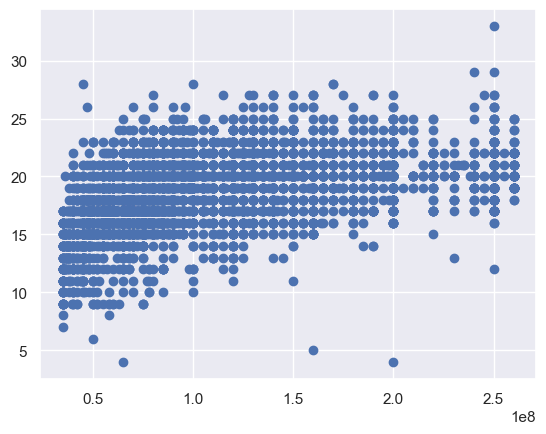

In [37]:
# Run correlation between total rooms and price
plt.scatter(
    x = dfLekki["price"],
    y = dfLekki["total_rooms"]
)
dfLekki["price"].corr(dfLekki["total_rooms"])

Total rooms had a moderate correlation with the price of the houses

               bedrooms  bathrooms   toilets  parking_space  total_rooms  \
bedrooms       1.000000   0.750079  0.768076       0.315122     0.836592   
bathrooms      0.750079   1.000000  0.762202       0.306990     0.839216   
toilets        0.768076   0.762202  1.000000       0.299910     0.840586   
parking_space  0.315122   0.306990  0.299910       1.000000     0.686447   
total_rooms    0.836592   0.839216  0.840586       0.686447     1.000000   
price          0.525320   0.405033  0.411606       0.274123     0.491508   

                  price  
bedrooms       0.525320  
bathrooms      0.405033  
toilets        0.411606  
parking_space  0.274123  
total_rooms    0.491508  
price          1.000000  


C:\Users\ogbegwa.oghenefego\AppData\Local\Temp\ipykernel_8552\379090734.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfLekki.corr()


<AxesSubplot: >

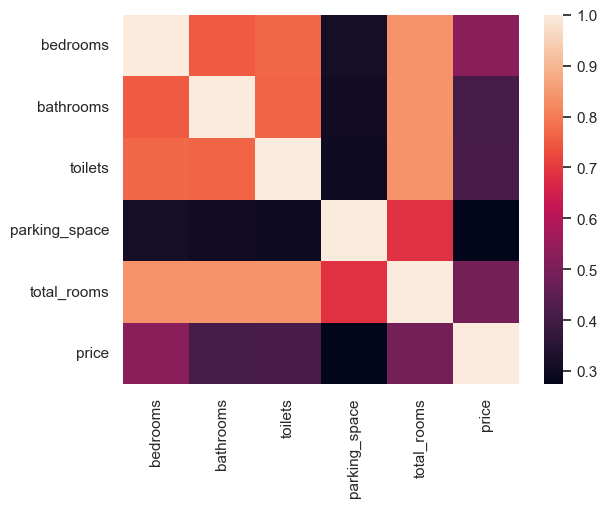

In [38]:
# Checking for multi collinearity
corr = dfLekki.corr()
print(corr)
sns.heatmap(corr)

In [39]:
# Drop multi-collinearity and low-cardinality features and also features not correlating with price

dfLekki.drop(columns=["bathrooms", "toilets", "town", 'parking_space', "total_rooms"], inplace=True)

C:\Users\ogbegwa.oghenefego\AppData\Local\Temp\ipykernel_8552\3854042822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfLekki.drop(columns=["bathrooms", "toilets", "town", 'parking_space', "total_rooms"], inplace=True)


In [40]:
dfLekki

,bedrooms,houseType,price
0,4.0,Detached Duplex,120000000.0
1,4.0,Semi Detached Duplex,75000000.0
2,4.0,Detached Duplex,65000000.0
3,1.0,Detached Duplex,200000000.0
4,4.0,Semi Detached Duplex,65000000.0
...,...,...,...
9129,4.0,Terraced Duplexes,75000000.0
9130,4.0,Semi Detached Duplex,110000000.0
9131,3.0,Detached Duplex,80000000.0
9132,4.0,Detached Duplex,68000000.0


In [41]:
#Trim DataFrame to remove Outliers 
q1, q9 = dfLekki['price'].quantile([0.1,0.9])
mask = dfLekki['price'].between(q1,q9)

trimmed_df_lekki = dfLekki[mask]


In [42]:
trimmed_df_lekki['price'].head().sort_values()

2     65000000.0
4     65000000.0
5     70000000.0
1     75000000.0
0    120000000.0
Name: price, dtype: float64

In [43]:
print(trimmed_df_lekki.head())
print()
print(f"There are {len(trimmed_df_lekki)} number of Houses in this sample")
trimmed_df_lekki.max()

   bedrooms             houseType        price
0       4.0       Detached Duplex  120000000.0
1       4.0  Semi Detached Duplex   75000000.0
2       4.0       Detached Duplex   65000000.0
4       4.0  Semi Detached Duplex   65000000.0
5       4.0  Semi Detached Duplex   70000000.0

There are 7526 number of Houses in this sample


bedrooms                   8.0
houseType    Terraced Duplexes
price              170000000.0
dtype: object

In [47]:
#Import ML libaries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

## Split Data

### Put something here fegs. kk

In [44]:
# The X argument is an input array that contains the feature data 
# (i.e., the variables/columns you want to use to build your model.
x = trimmed_df_lekki[(trimmed_df_lekki.drop(columns="price")).columns]
#The y argument typically contains the vector of target values 
# (i.e., the target or label of your data).
y = trimmed_df_lekki["price"]

print(x)
print(y)

      bedrooms             houseType
0          4.0       Detached Duplex
1          4.0  Semi Detached Duplex
2          4.0       Detached Duplex
4          4.0  Semi Detached Duplex
5          4.0  Semi Detached Duplex
...        ...                   ...
9129       4.0     Terraced Duplexes
9130       4.0  Semi Detached Duplex
9131       3.0       Detached Duplex
9132       4.0       Detached Duplex
9133       4.0       Detached Duplex

[7526 rows x 2 columns]
0       120000000.0
1        75000000.0
2        65000000.0
4        65000000.0
5        70000000.0
           ...     
9129     75000000.0
9130    110000000.0
9131     80000000.0
9132     68000000.0
9133     65000000.0
Name: price, Length: 7526, dtype: float64


In [55]:
# Test Train Split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

X 
The X argument is an input array that contains the feature data (i.e., the variables/columns you want to use to build your model.

Y
The y argument typically contains the vector of target values (i.e., the target or label of your data).

TEST_SIZE
The test_size parameter enables you to specify the size of the output test set.





### Building Model

##### Model Baseline

In [58]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
print("Mean price:", y_mean)
print("Baseline MAE:", mean_absolute_error(y_train, y_pred_baseline))

Mean price: 101674548.17342193
Baseline MAE: 27786087.007510073


##### Model

In [59]:
model = make_pipeline(OneHotEncoder(use_cat_names=True),Ridge())
model.fit(x_train, y_train)

c:\Users\ogbegwa.oghenefego\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['houseType'], use_cat_names=True)),
                ('ridge', Ridge())])

In [60]:
y_pred_training = model.predict(x_train)
print("Training MAE:", mean_absolute_error(y_pred_training, y_train))

Training MAE: 21697062.496133287


<AxesSubplot: >

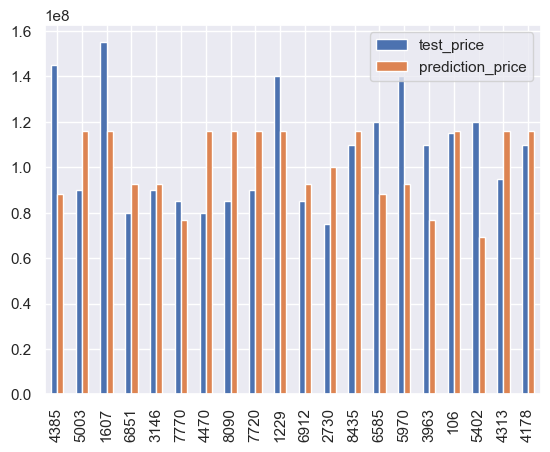

In [68]:
prediction_data = model.predict(x_test)
model_result = pd.DataFrame({'test_price': y_test, "prediction_price": prediction_data})
model_result.head(20).plot(kind="bar")

In [64]:
print("Test MAE:", mean_absolute_error(prediction_data, y_test))

Test MAE: 21972421.36270059


### Result Computation

In [69]:
intercept = model.named_steps["ridge"].intercept_
coefficients = model.named_steps["ridge"].coef_
print("intercept:", intercept)
print("coefficients len:", len(coefficients))
print(coefficients[:5])  # First five coefficients

intercept: -5056956.743607938
coefficients len: 8
[ 23327599.2962031  -11481855.05864491   4292213.45343209
    -23753.2824397   18091638.01033625]


In [70]:
feature_names = model.named_steps["onehotencoder"].get_feature_names()
print("features len:", len(feature_names))
print(feature_names)

features len: 8
['bedrooms', 'houseType_Semi Detached Duplex', 'houseType_Detached Duplex', 'houseType_Terraced Duplexes', 'houseType_Block of Flats', 'houseType_Terraced Bungalow', 'houseType_Detached Bungalow', 'houseType_Semi Detached Bungalow']


In [71]:
feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp

bedrooms                            2.332760e+07
houseType_Semi Detached Duplex     -1.148186e+07
houseType_Detached Duplex           4.292213e+06
houseType_Terraced Duplexes        -2.375328e+04
houseType_Block of Flats            1.809164e+07
houseType_Terraced Bungalow         7.046635e+05
houseType_Detached Bungalow        -1.378195e+06
houseType_Semi Detached Bungalow   -1.020471e+07
dtype: float64

Text(0.5, 1.0, 'Importance [₦10M] vs Features')

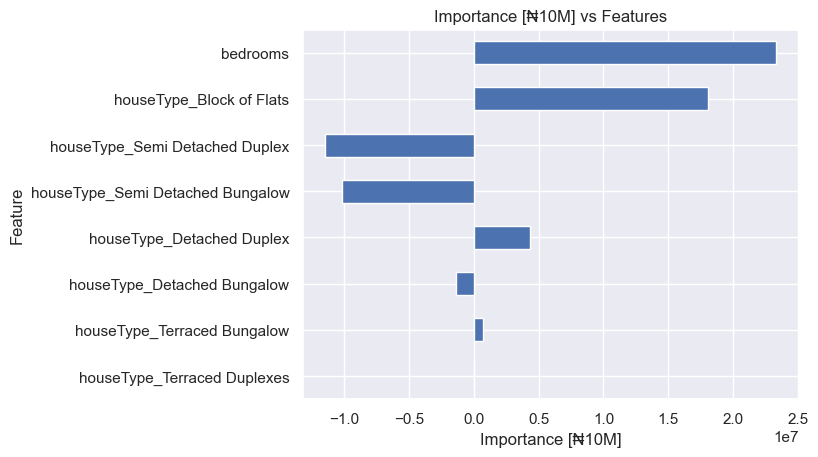

In [72]:
feat_imp.sort_values(key=abs).plot(kind="barh")
plt.xlabel("Importance [₦10M]")
plt.ylabel("Feature")
plt.title("Importance [₦10M] vs Features")

The barplot shows that the number of bedrooms affect the price the most. 
Also notice that:
If the house is a Semi Detached Duplex, the price of the house depreciates
If the house is a Semi Detached Bungalow, the price of the house depreciates
Also if the house is a Detached Bungalow, the price of the house depreciates a little.

In [116]:
# Create function to make prediction
def make_prediction(bedrooms, houseType):
    data = {"bedrooms":bedrooms,
            "houseType":houseType}

    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted house price: N{prediction}"


In [117]:
# Testing Fuction
make_prediction(4, "Detached Bungalow")

'Predicted house price: N86875245.75'

#### Create Slider

In [119]:
interact(
    make_prediction,
    bedrooms=IntSlider(
        min=x_train["bedrooms"].min(),
        max=x_train["bedrooms"].max(),
        value=x_train["bedrooms"].mean(),
    ),
    houseType=Dropdown(options=sorted(x_train["houseType"].unique())),
)

interactive(children=(IntSlider(value=4, description='bedrooms', max=7, min=1), Dropdown(description='houseTyp…

<function __main__.make_prediction(bedrooms, houseType)>

### Conclusions

Excluding Banana Island in Lagos, Ikoyi has the most expensive houses in Nigeria, second to Maitama District in Abuja.
The number of bedrooms in a house in Lekki is key in predicting the price of the house. 

Some features are highly correlated. For example, the more the bedrooms, the more the bathrooms so the number of bathrooms is not needed for the model to predict the price of a house.


In [120]:
print("That's all folks")

That's all folks
